## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the Data

In [2]:
df = pd.read_csv("../DATA/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# EDA
## General Feature Exploration

In [7]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

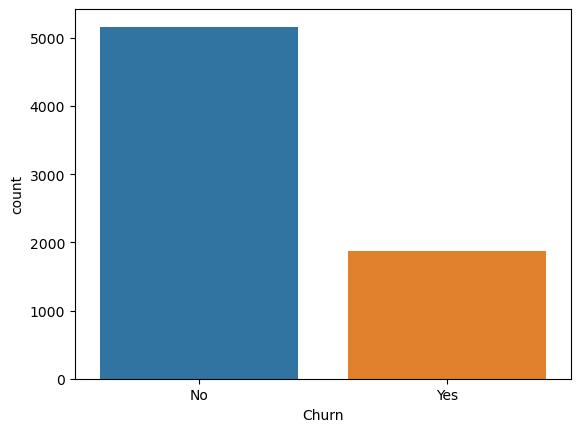

In [8]:
sns.countplot(data=df, x="Churn")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

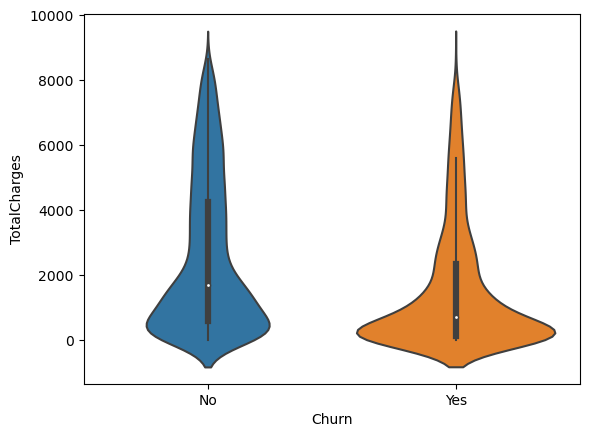

In [9]:
sns.violinplot(data=df, x="Churn", y="TotalCharges")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

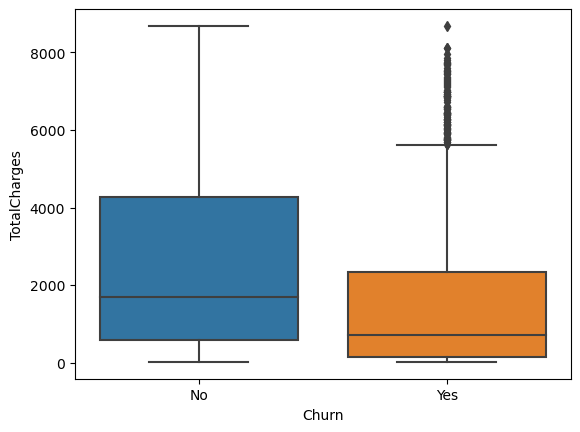

In [13]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")

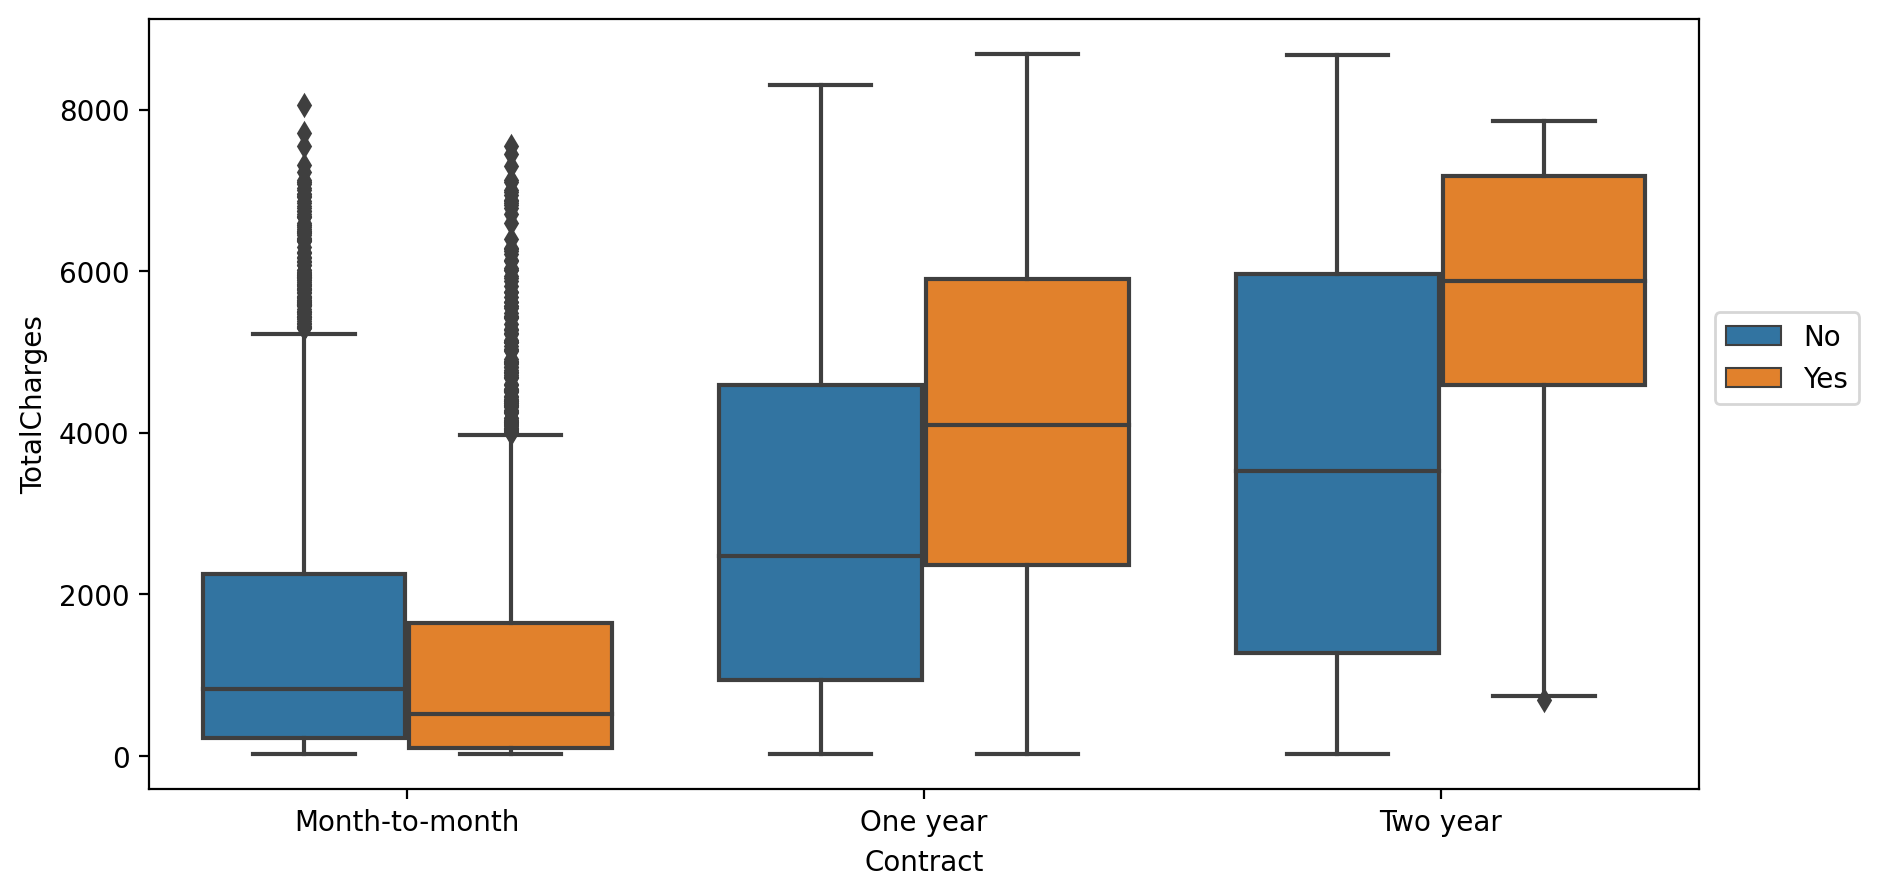

In [12]:
plt.figure(figsize=(10, 5), dpi=200)
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc=(1.01, 0.5));

In [16]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]) * 1

In [20]:
corr_yes_churn = df_corr.corr()["Churn_Yes"].sort_values().iloc[1:-1]

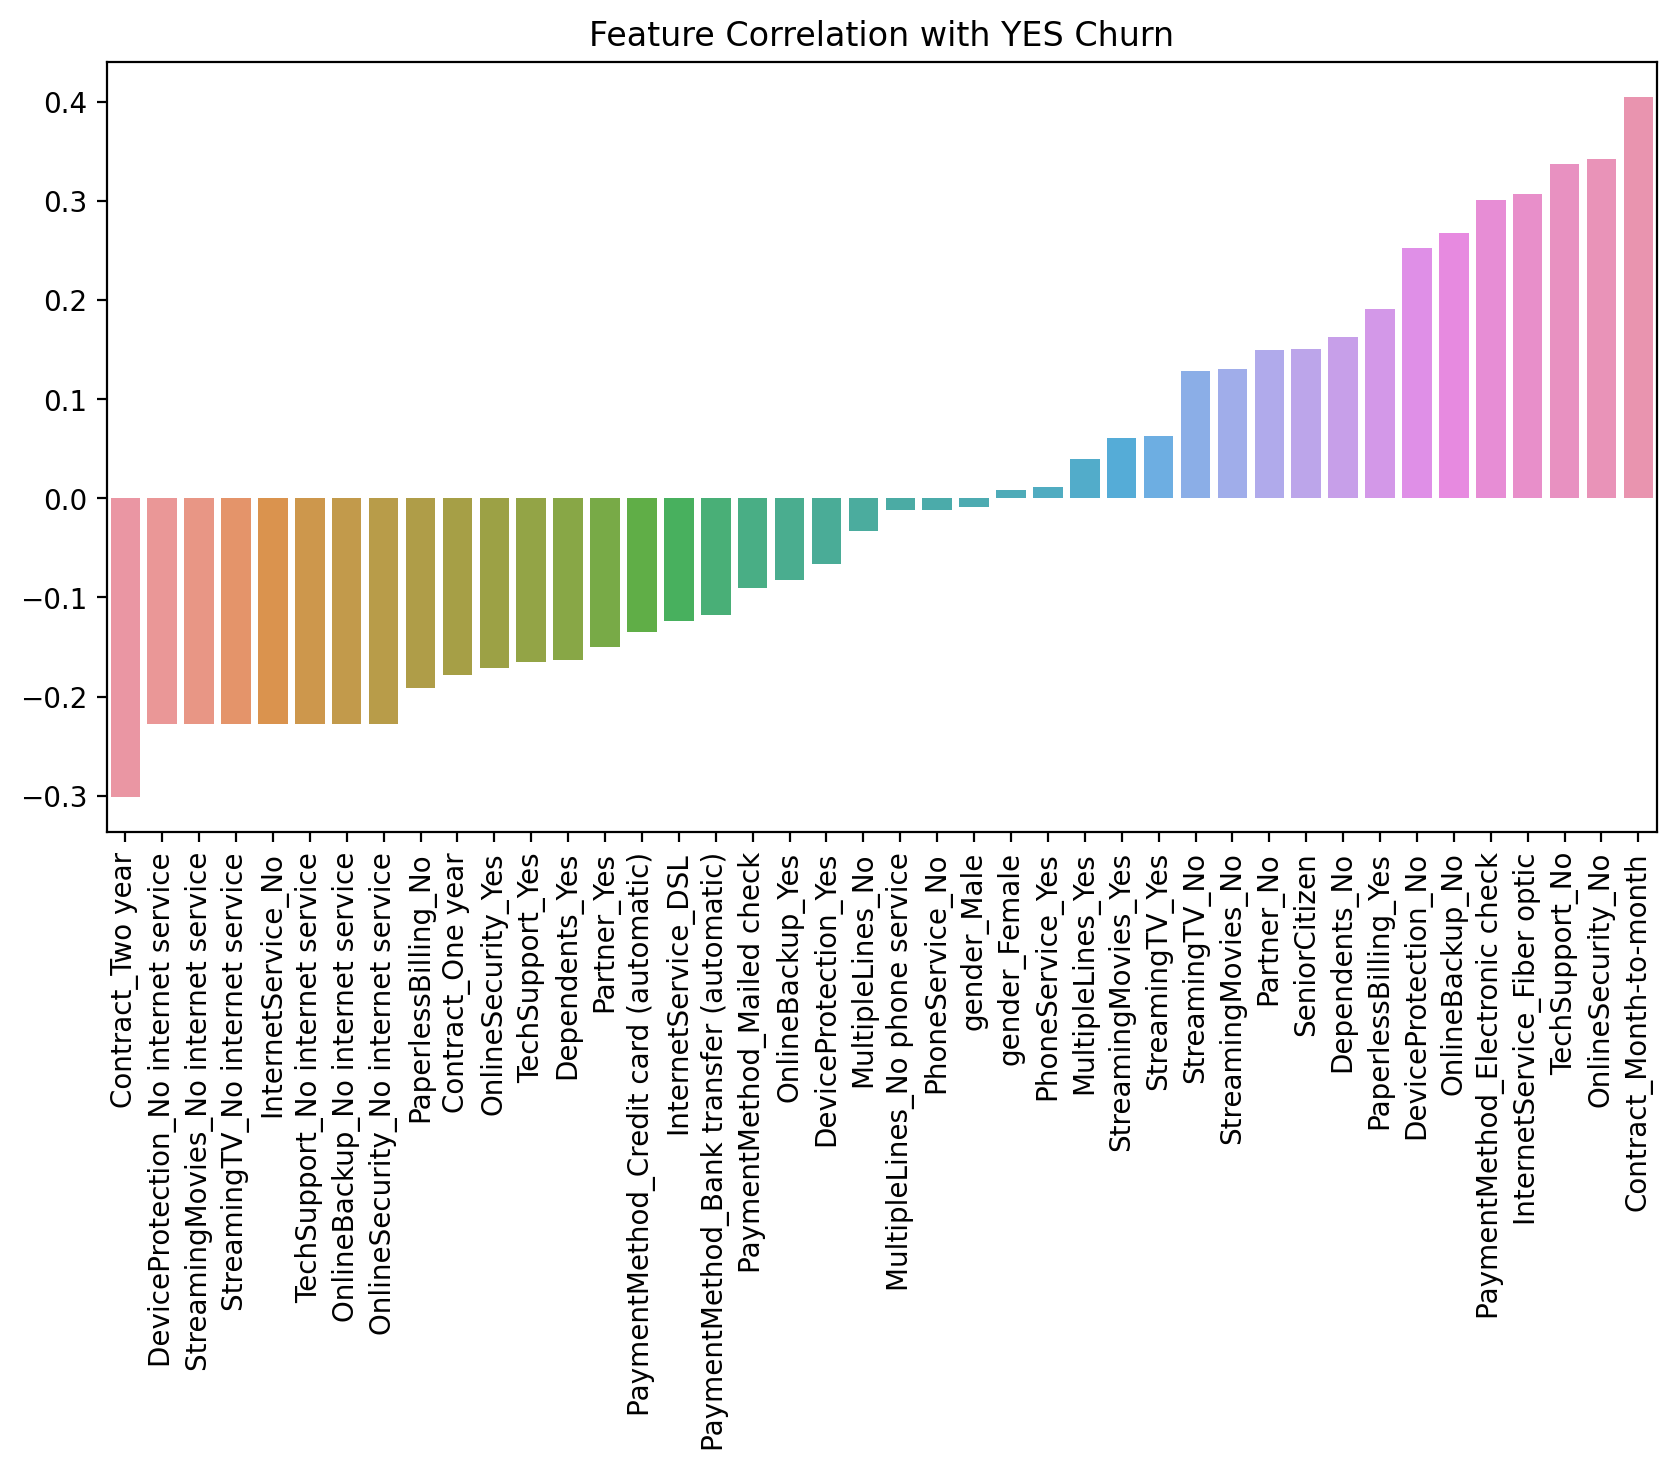

In [22]:
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title("Feature Correlation with YES Churn")
plt.xticks(rotation=90);

In [23]:
corr_no_churn = df_corr.corr()["Churn_No"].sort_values().iloc[1:-1]

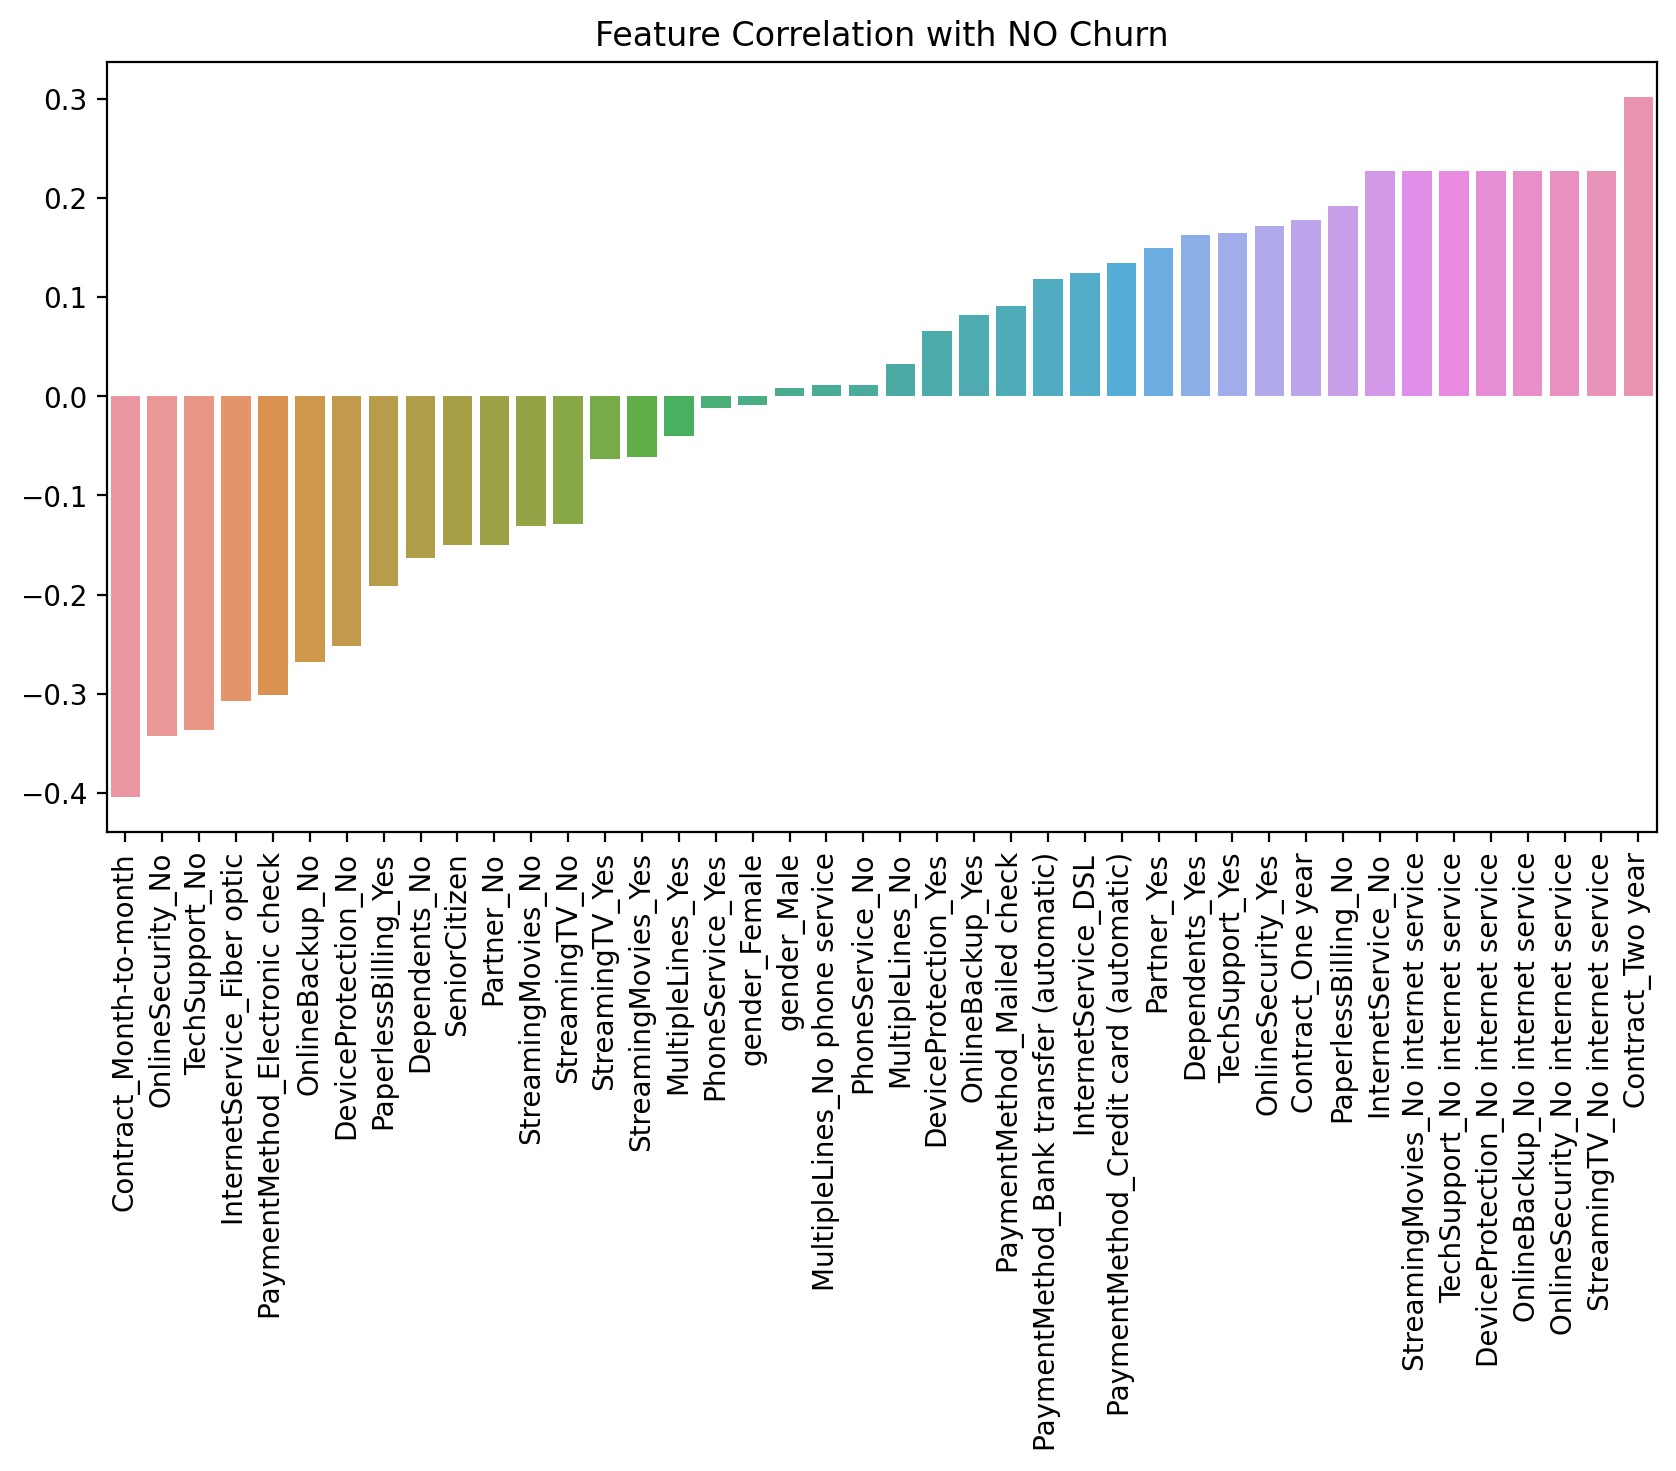

In [24]:
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=corr_no_churn.index, y=corr_no_churn.values)
plt.title("Feature Correlation with NO Churn")
plt.xticks(rotation=90);

# Churn Analysis

In [25]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

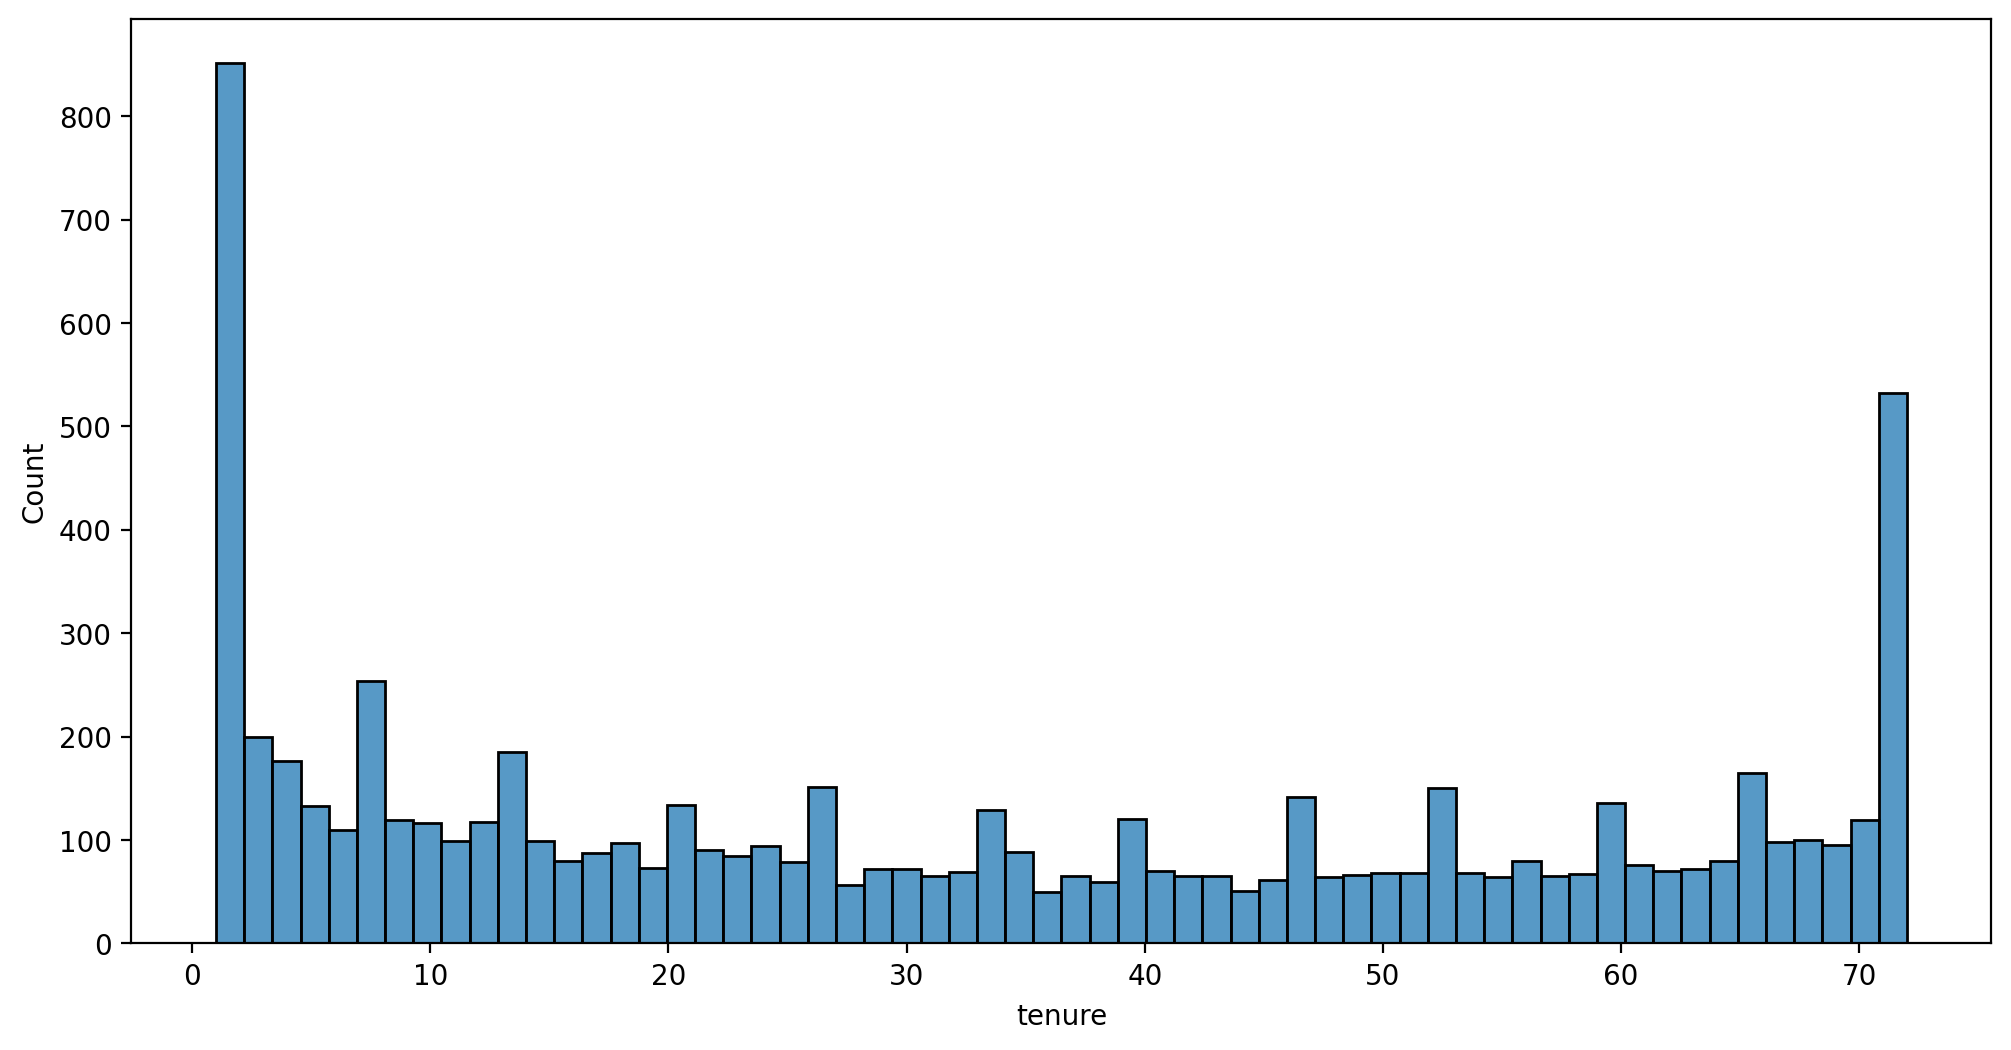

In [27]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="tenure", bins=60)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


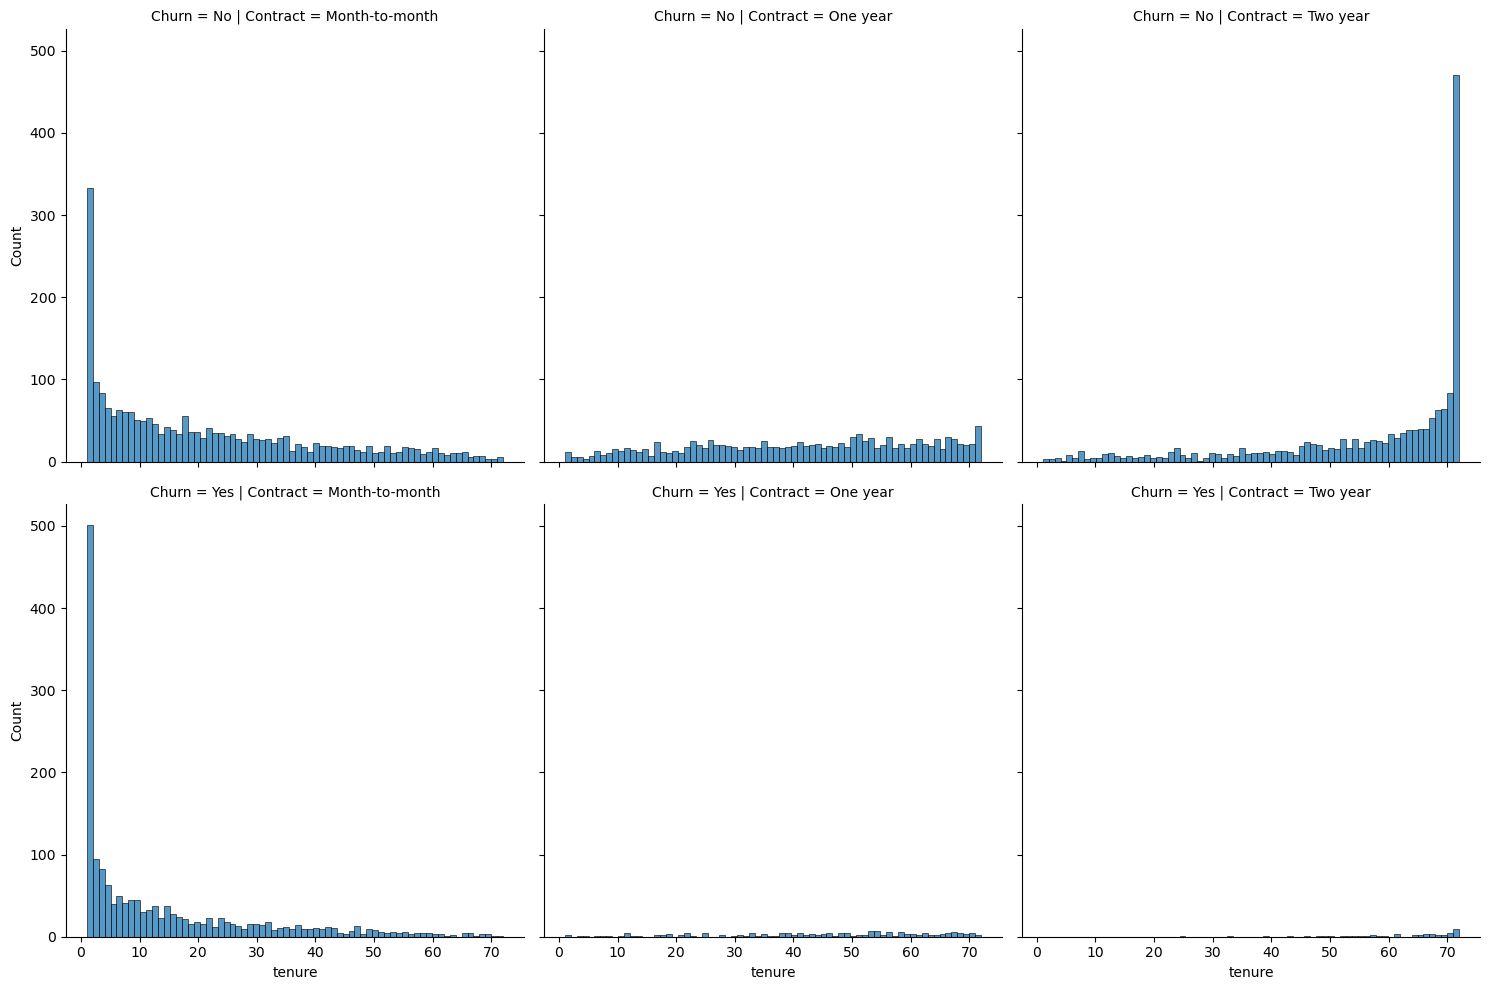

In [28]:
sns.displot(data=df, x="tenure", bins=70, col="Contract", row="Churn")

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

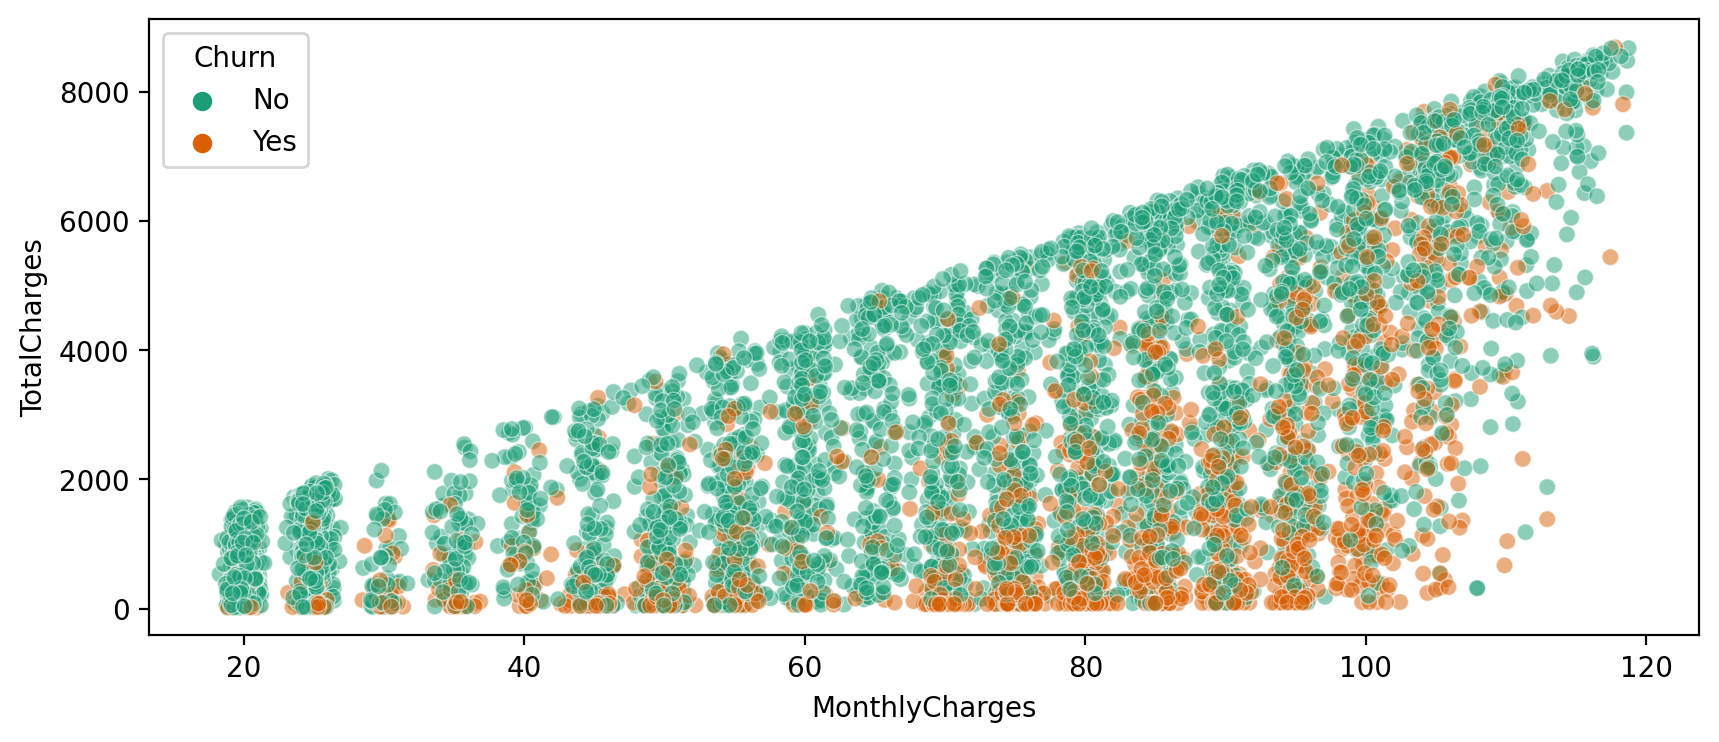

In [33]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.5, lw=0.3, palette="Dark2")

In [45]:
yes_churn = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]

In [46]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [35]:
no_churn = df.groupby(["Churn", "tenure"]).count().transpose()["No"]

In [47]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [36]:
churn_rate = 100 * yes_churn / (yes_churn + no_churn)

In [37]:
churn_rate.transpose()["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

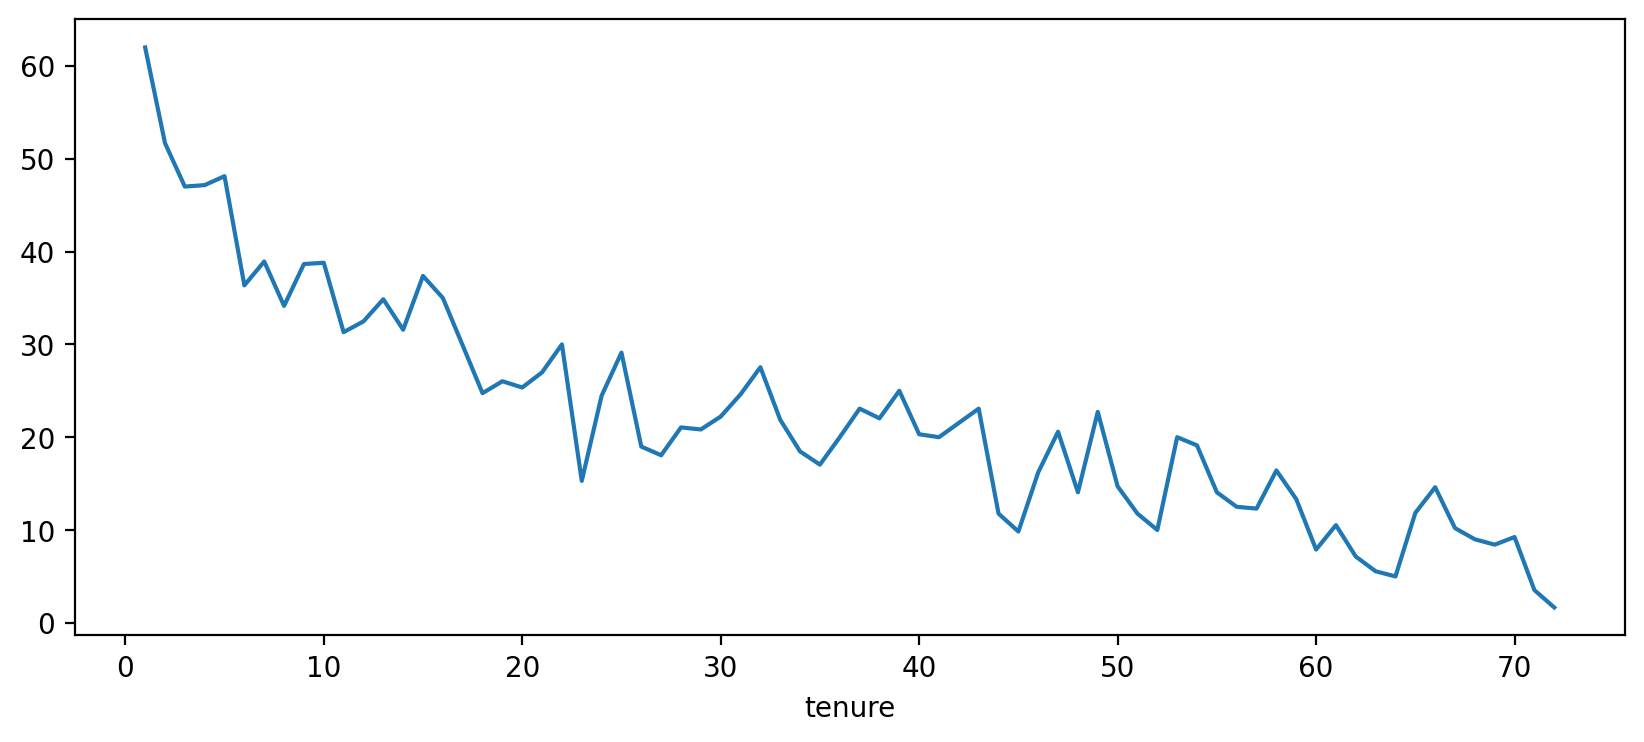

In [38]:
plt.figure(figsize=(10,4), dpi=200)
churn_rate.transpose()["customerID"].plot()

In [48]:
def cohort(tenure):
    if tenure < 13:
        return "0-12 Months"
    elif tenure < 25:
        return "12-24 Months"
    elif tenure < 49:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [49]:
df["Tenure Cohort"] = df["tenure"].apply(cohort)

In [50]:
df[["Tenure Cohort", "tenure"]]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

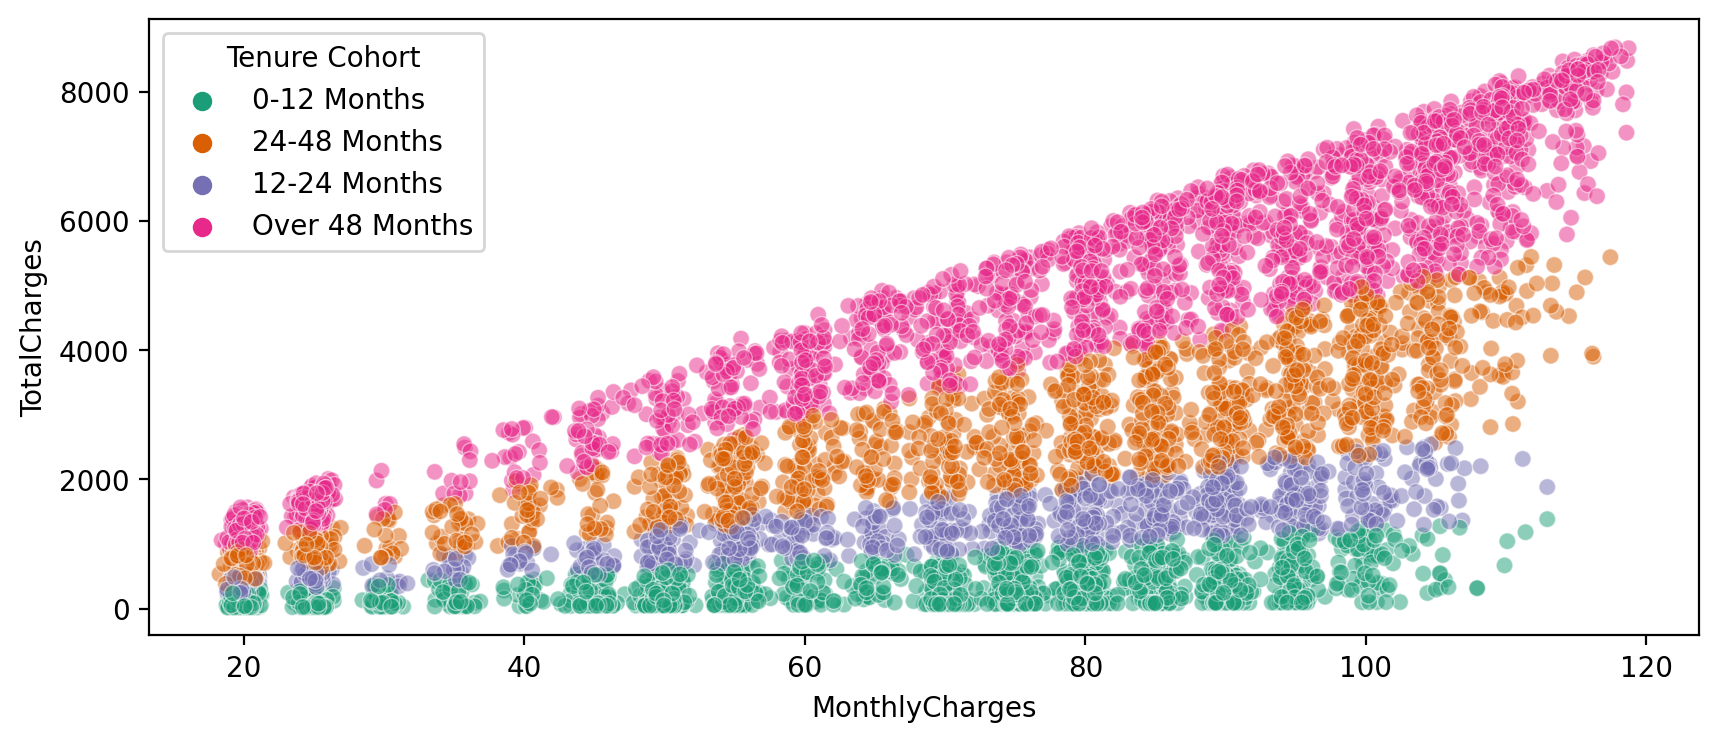

In [51]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort", alpha=0.5, lw=0.3, palette="Dark2")

<Axes: xlabel='Tenure Cohort', ylabel='count'>

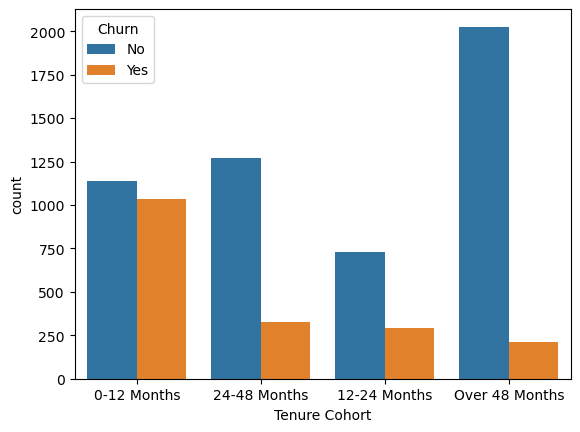

In [52]:
sns.countplot(data=df, x="Tenure Cohort", hue="Churn")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


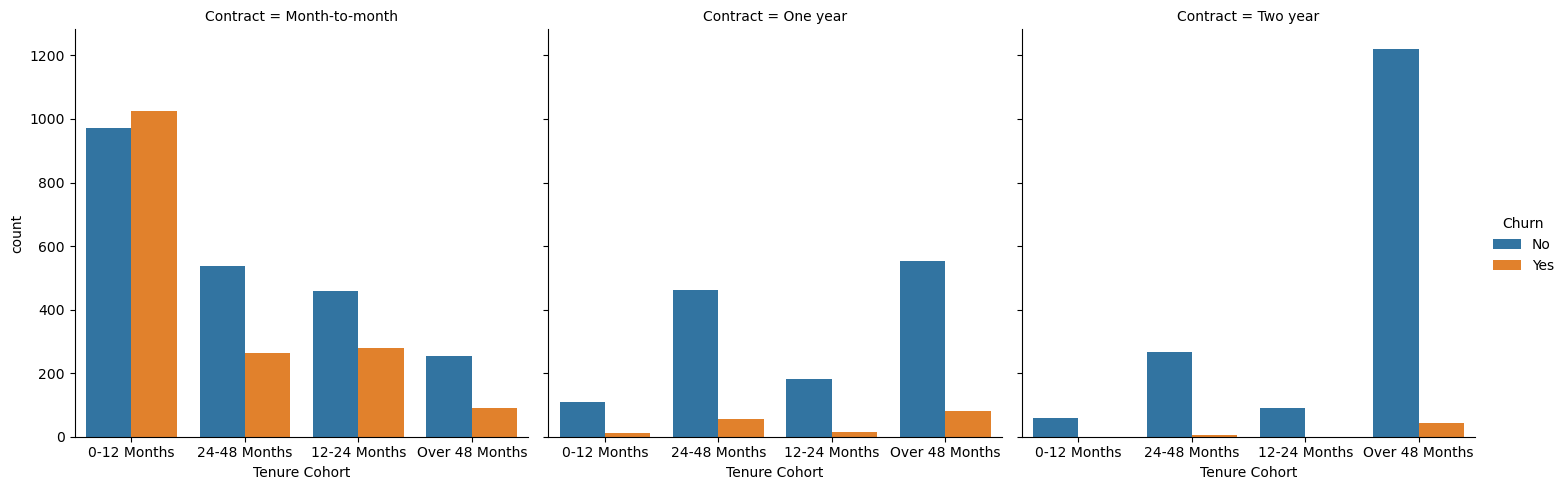

In [53]:
sns.catplot(data=df, x="Tenure Cohort", hue="Churn", kind="count", col="Contract")

# Predictive Modeling
## Single Decision Tree

In [54]:
X = pd.get_dummies(df.drop(["Churn", "customerID"], axis=1), drop_first=True)

In [55]:
y = df["Churn"]

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()

In [61]:
param_grid = {"criterion": ["gini", "entropy"],
             "max_depth": [4, 6, 10, 12]}

In [63]:
dt_grid = GridSearchCV(dt, param_grid)

In [64]:
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10, 12]})

In [65]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [66]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [67]:
predictions = dt_grid.predict(X_test)

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       557
         Yes       0.54      0.38      0.45       147

    accuracy                           0.80       704
   macro avg       0.69      0.65      0.66       704
weighted avg       0.78      0.80      0.79       704



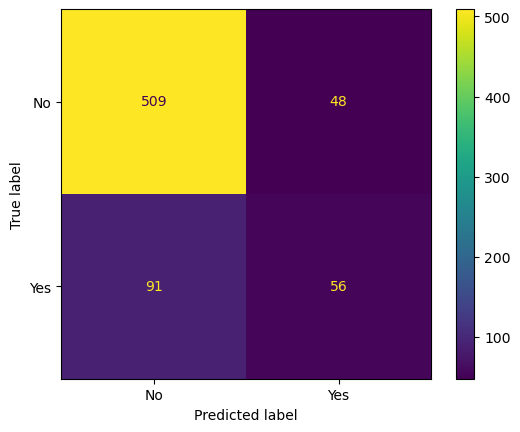

In [69]:
ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test)

In [73]:
imp_feats = pd.DataFrame(index=X.columns, data=dt_grid.best_estimator_.feature_importances_, columns=["Importance"]).sort_values("Importance")

In [74]:
imp_feats

,Importance
Tenure Cohort_Over 48 Months,0.000000
StreamingTV_No internet service,0.000000
TechSupport_Yes,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure Cohort_24-48 Months,0.000000
OnlineBackup_Yes,0.000000
OnlineBackup_No internet service,0.000000
OnlineSecurity_Yes,0.000000
OnlineSecurity_No internet service,0.000000


In [75]:
imp_feats = imp_feats[imp_feats["Importance"] > 0]

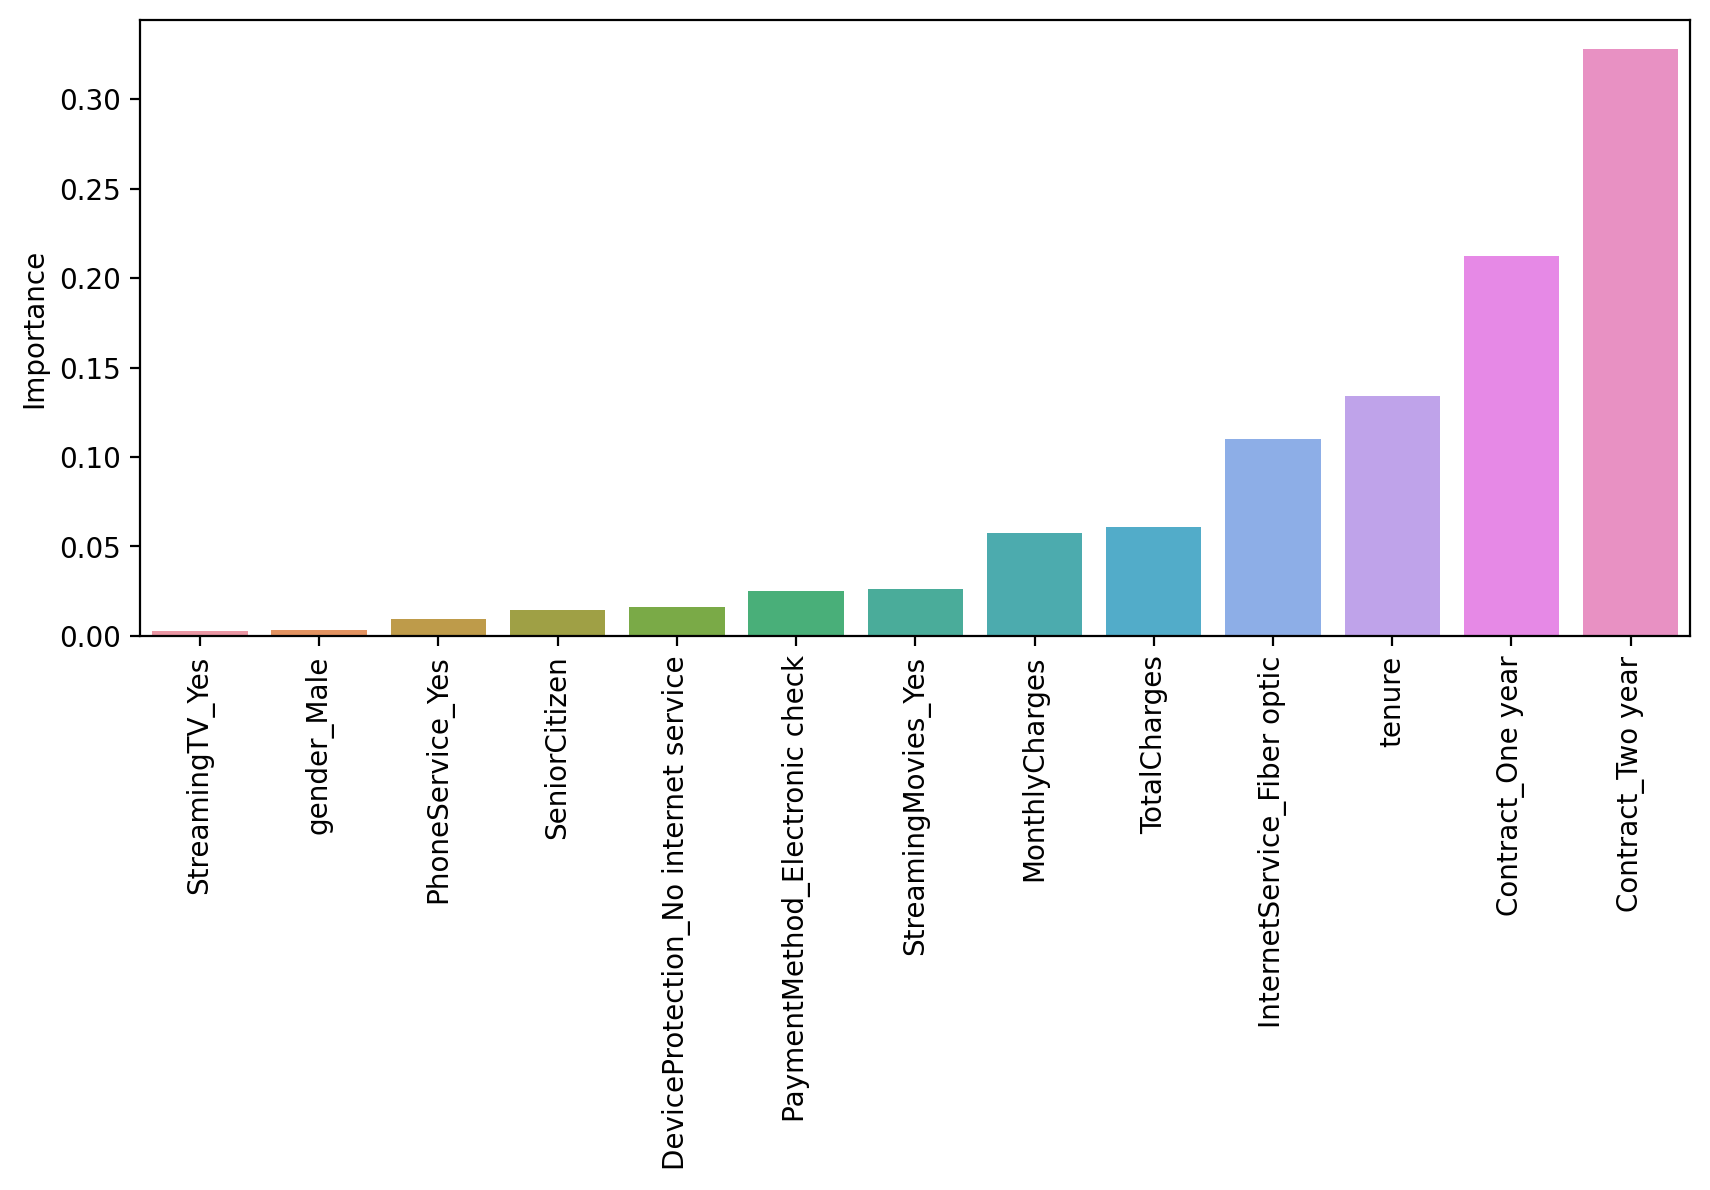

In [78]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y="Importance")
plt.xticks(rotation=90);

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(max_depth=6)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [86]:
predictions = rf.predict(X_test)

In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.62      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.82      0.83      0.82       704



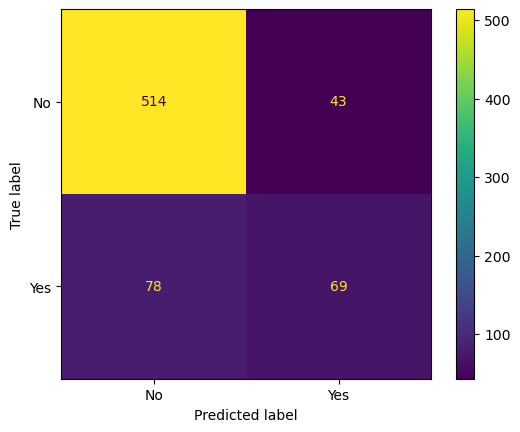

In [88]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

## Boosted Trees

In [89]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [90]:
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [92]:
ada_model.fit(X_train, y_train)


AdaBoostClassifier()

In [93]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
ada_preds = ada_model.predict(X_test)

In [95]:
gb_preds = gb_model.predict(X_test)

In [96]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [97]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



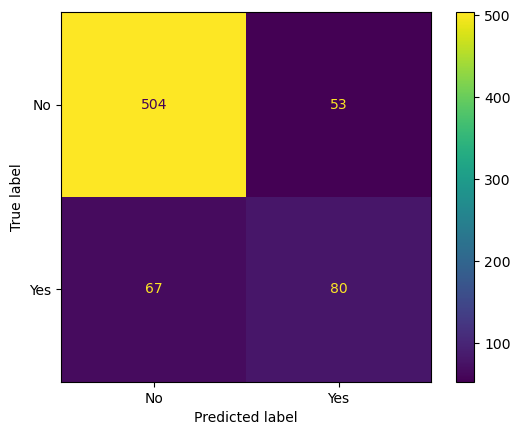

In [98]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)